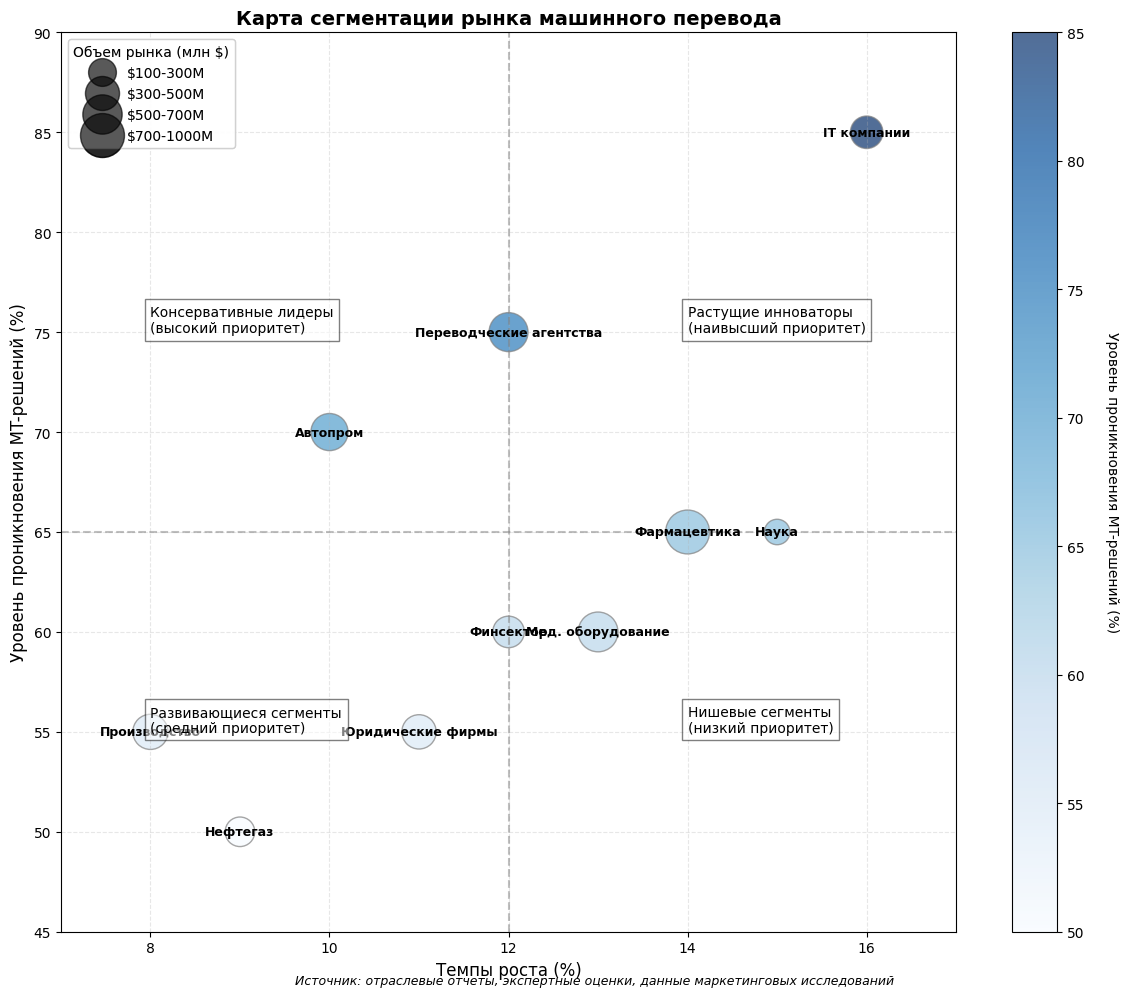

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Данные для визуализации
segments = {
    'Фармацевтика': {'size': 950, 'growth': 14, 'adoption': 65},
    'Мед. оборудование': {'size': 780, 'growth': 13, 'adoption': 60},
    'Переводческие агентства': {'size': 750, 'growth': 12, 'adoption': 75},
    'Автопром': {'size': 680, 'growth': 10, 'adoption': 70},
    'Юридические фирмы': {'size': 580, 'growth': 11, 'adoption': 55},
    'IT компании': {'size': 520, 'growth': 16, 'adoption': 85},
    'Нефтегаз': {'size': 430, 'growth': 9, 'adoption': 50},
    'Наука': {'size': 320, 'growth': 15, 'adoption': 65},
    'Финсектор': {'size': 490, 'growth': 12, 'adoption': 60},
    'Производство': {'size': 610, 'growth': 8, 'adoption': 55}
}

# Создаем фигуру
plt.figure(figsize=(12, 10))

# Создаем цветовую карту для уровня проникновения MT
norm = mcolors.Normalize(vmin=40, vmax=90)
cmap = cm.Blues

# Настраиваем размер пузырей
sizes = [s['size'] for s in segments.values()]
sizes_normalized = [s/max(sizes)*1000 for s in sizes]

# Размещаем пузыри на графике
x = np.array([s['growth'] for s in segments.values()])
y = np.array([s['adoption'] for s in segments.values()])

# Создаем пузырьковую диаграмму
scatter = plt.scatter(x, y, s=sizes_normalized, c=[s['adoption'] for s in segments.values()], 
                     cmap=cmap, alpha=0.7, edgecolors='gray', linewidth=1)

# Добавляем подписи к пузырям
for i, (segment, data) in enumerate(segments.items()):
    plt.annotate(segment, (data['growth'], data['adoption']),
                ha='center', va='center', fontsize=9, fontweight='bold')

# Добавляем легенду для размера пузырей
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
size_legend = plt.legend(handles, 
                         ['$100-300M', '$300-500M', '$500-700M', '$700-1000M'], 
                         loc="upper left", title="Объем рынка (млн $)")
plt.gca().add_artist(size_legend)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Уровень проникновения MT-решений (%)', rotation=270, labelpad=25)

# Добавляем линии для деления на квадранты
plt.axhline(y=65, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=12, color='gray', linestyle='--', alpha=0.5)

# Добавляем подписи для квадрантов
plt.text(8, 55, 'Развивающиеся сегменты\n(средний приоритет)', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(8, 75, 'Консервативные лидеры\n(высокий приоритет)', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(14, 55, 'Нишевые сегменты\n(низкий приоритет)', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(14, 75, 'Растущие инноваторы\n(наивысший приоритет)', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Настройка осей
plt.xlim(7, 17)
plt.ylim(45, 90)
plt.xlabel('Темпы роста (%)', fontsize=12)
plt.ylabel('Уровень проникновения MT-решений (%)', fontsize=12)
plt.title('Карта сегментации рынка машинного перевода', fontsize=14, fontweight='bold')

# Добавляем сетку
plt.grid(True, linestyle='--', alpha=0.3)

# Дополнительная информация
plt.figtext(0.5, 0.01, 'Источник: отраслевые отчеты, экспертные оценки, данные маркетинговых исследований', 
            ha='center', fontsize=9, fontstyle='italic')

plt.tight_layout()
plt.savefig('market_segmentation_map.png', dpi=300, bbox_inches='tight')
plt.show()

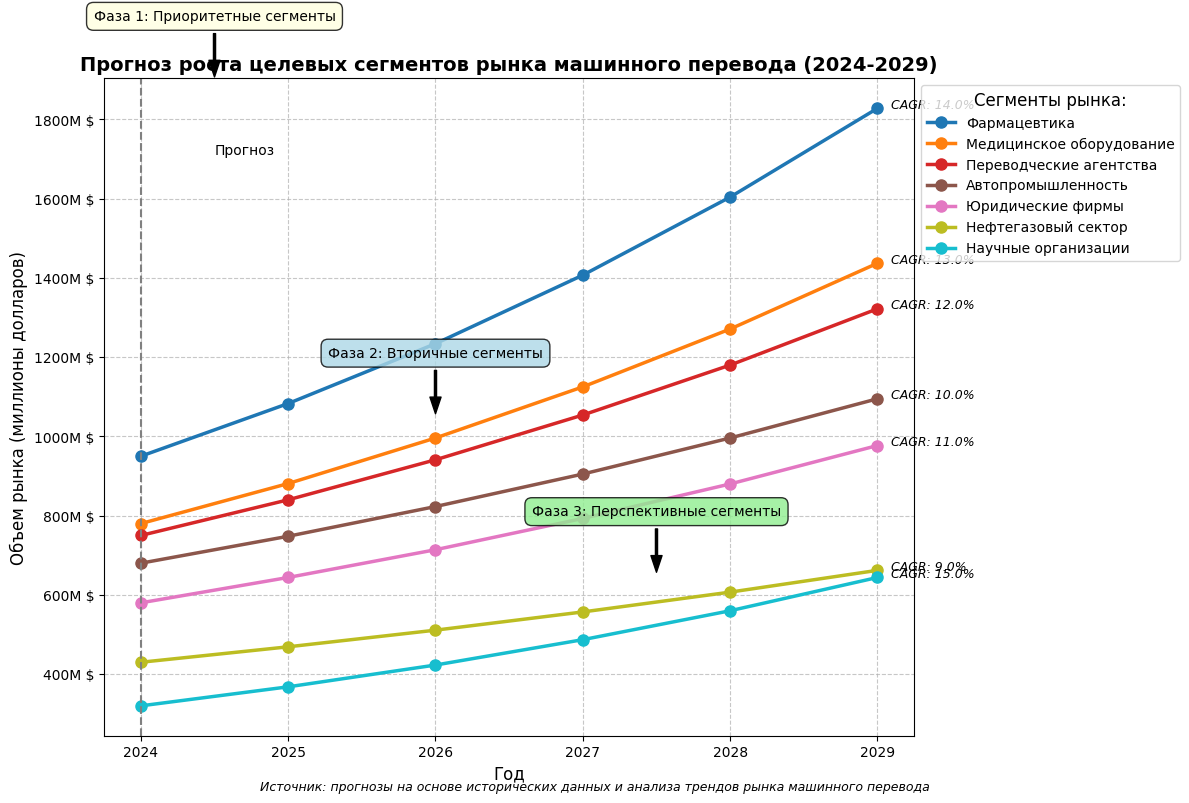

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Данные для прогноза на 5 лет (в миллионах долларов)
years = [2024, 2025, 2026, 2027, 2028, 2029]

segments = {
    'Фармацевтика': [950, 1083, 1234, 1407, 1604, 1828],
    'Медицинское оборудование': [780, 881, 996, 1125, 1271, 1437],
    'Переводческие агентства': [750, 840, 941, 1054, 1180, 1322],
    'Автопромышленность': [680, 748, 823, 905, 996, 1095],
    'Юридические фирмы': [580, 644, 714, 793, 880, 977],
    'Нефтегазовый сектор': [430, 469, 511, 557, 607, 662],
    'Научные организации': [320, 368, 423, 487, 560, 644]
}

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Цветовая палитра
colors = plt.cm.tab10(np.linspace(0, 1, len(segments)))

# Рисуем линии для каждого сегмента
for (segment, values), color in zip(segments.items(), colors):
    plt.plot(years, values, marker='o', linewidth=2.5, markersize=8, label=segment, color=color)

# Форматирование осей
def millions_formatter(x, pos):
    return f'{int(x)}M $'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Добавляем подписи и легенду
plt.xlabel('Год', fontsize=12)
plt.ylabel('Объем рынка (миллионы долларов)', fontsize=12)
plt.title('Прогноз роста целевых сегментов рынка машинного перевода (2024-2029)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(years)

# Добавляем легенду
plt.legend(title='Сегменты рынка:', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Аннотируем данные
for segment, values in segments.items():
    # Добавляем CAGR для каждого сегмента
    cagr = ((values[-1] / values[0]) ** (1/5) - 1) * 100
    plt.annotate(f'CAGR: {cagr:.1f}%',
                xy=(years[-1], values[-1]),
                xytext=(10, 0),
                textcoords='offset points',
                fontsize=9,
                fontstyle='italic')

# Добавляем вертикальную линию, разделяющую историю и прогноз
plt.axvline(x=2024, color='gray', linestyle='--')
plt.annotate('Прогноз', xy=(2024.5, plt.ylim()[1]*0.9), fontsize=10)

# Добавляем стрелки с фазами приоритетизации сегментов
plt.annotate('Фаза 1: Приоритетные сегменты', 
            xy=(2024.5, 1900),
            xytext=(2024.5, 2050),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

plt.annotate('Фаза 2: Вторичные сегменты', 
            xy=(2026, 1050),
            xytext=(2026, 1200),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.annotate('Фаза 3: Перспективные сегменты', 
            xy=(2027.5, 650),
            xytext=(2027.5, 800),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

# Дополнительная информация
plt.figtext(0.5, 0.01, 'Источник: прогнозы на основе исторических данных и анализа трендов рынка машинного перевода', 
            ha='center', fontsize=9, fontstyle='italic')

plt.tight_layout()
plt.savefig('market_segments_growth_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

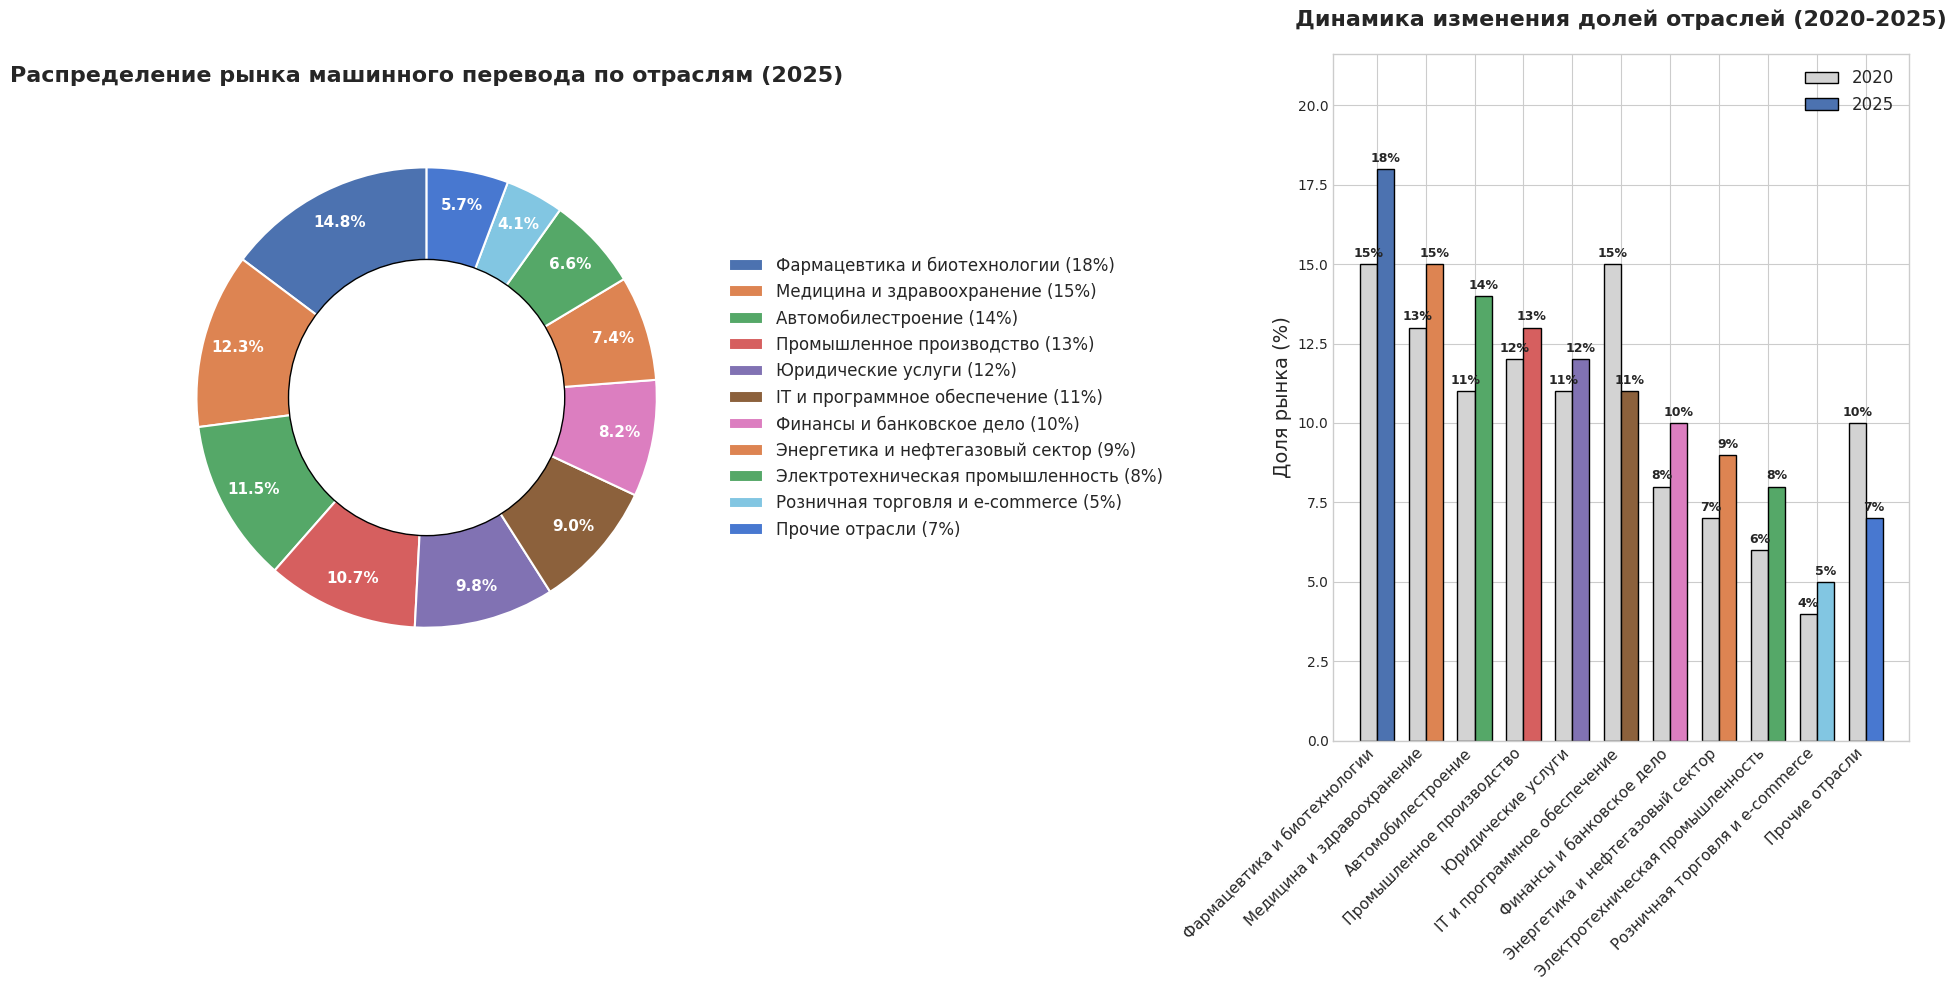

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
plt.rcParams['font.family'] = 'Arial'

# Данные для визуализации
industries = [
    'Фармацевтика и биотехнологии', 
    'Медицина и здравоохранение',
    'Автомобилестроение', 
    'Промышленное производство',
    'Юридические услуги', 
    'IT и программное обеспечение',
    'Финансы и банковское дело',
    'Энергетика и нефтегазовый сектор',
    'Электротехническая промышленность',
    'Розничная торговля и e-commerce',
    'Прочие отрасли'
]

# Текущие значения (2025)
current_values = [18, 15, 14, 13, 12, 11, 10, 9, 8, 5, 7]  # в процентах

# Ретроспективные значения (2020)
past_values = [15, 13, 11, 12, 11, 15, 8, 7, 6, 4, 10]  # в процентах

# Создание фигуры с двумя диаграммами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Настройка цветов
colors = sns.color_palette("muted", len(industries))
highlight_colors = colors.copy()

# Выделим приоритетные сегменты ярче
priority_segments = [0, 1, 2, 4, 7, 8]  # индексы приоритетных сегментов
for i in priority_segments:
    highlight_colors[i] = sns.color_palette("deep")[i % 6]

# Круговая диаграмма для текущих значений
wedges, texts, autotexts = ax1.pie(
    current_values, 
    labels=None, 
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=highlight_colors,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Настройка автотекста
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Добавляем круг внутри для лучшего вида
centre_circle = plt.Circle((0, 0), 0.6, fc='white', edgecolor='black', linewidth=1)
ax1.add_patch(centre_circle)

# Название графика
ax1.set_title('Распределение рынка машинного перевода по отраслям (2025)', fontsize=16, weight='bold', pad=20)

# Создание секторной диаграммы для сравнения 2020 и 2025
x = np.arange(len(industries))
width = 0.35

# Первая группа столбцов
bars1 = ax2.bar(x - width/2, past_values, width, label='2020', color='lightgrey', edgecolor='black', linewidth=1)

# Вторая группа столбцов
bars2 = ax2.bar(x + width/2, current_values, width, label='2025', color=highlight_colors, edgecolor='black', linewidth=1)

# Добавление подписей, названия и легенды
ax2.set_title('Динамика изменения долей отраслей (2020-2025)', fontsize=16, weight='bold', pad=20)
ax2.set_ylabel('Доля рынка (%)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(industries, rotation=45, ha='right', fontsize=11)
ax2.legend(fontsize=12)

# Добавление значений на столбцы
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, weight='bold')

add_value_labels(ax2, bars1)
add_value_labels(ax2, bars2)

# Лимиты для осей
ax2.set_ylim(0, max(max(current_values), max(past_values)) * 1.2)

# Создаем легенду для первого графика
legend_labels = [f"{industries[i]} ({current_values[i]}%)" for i in range(len(industries))]
ax1.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Общая настройка
plt.tight_layout()
plt.savefig('market_distribution_by_industry.png', dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

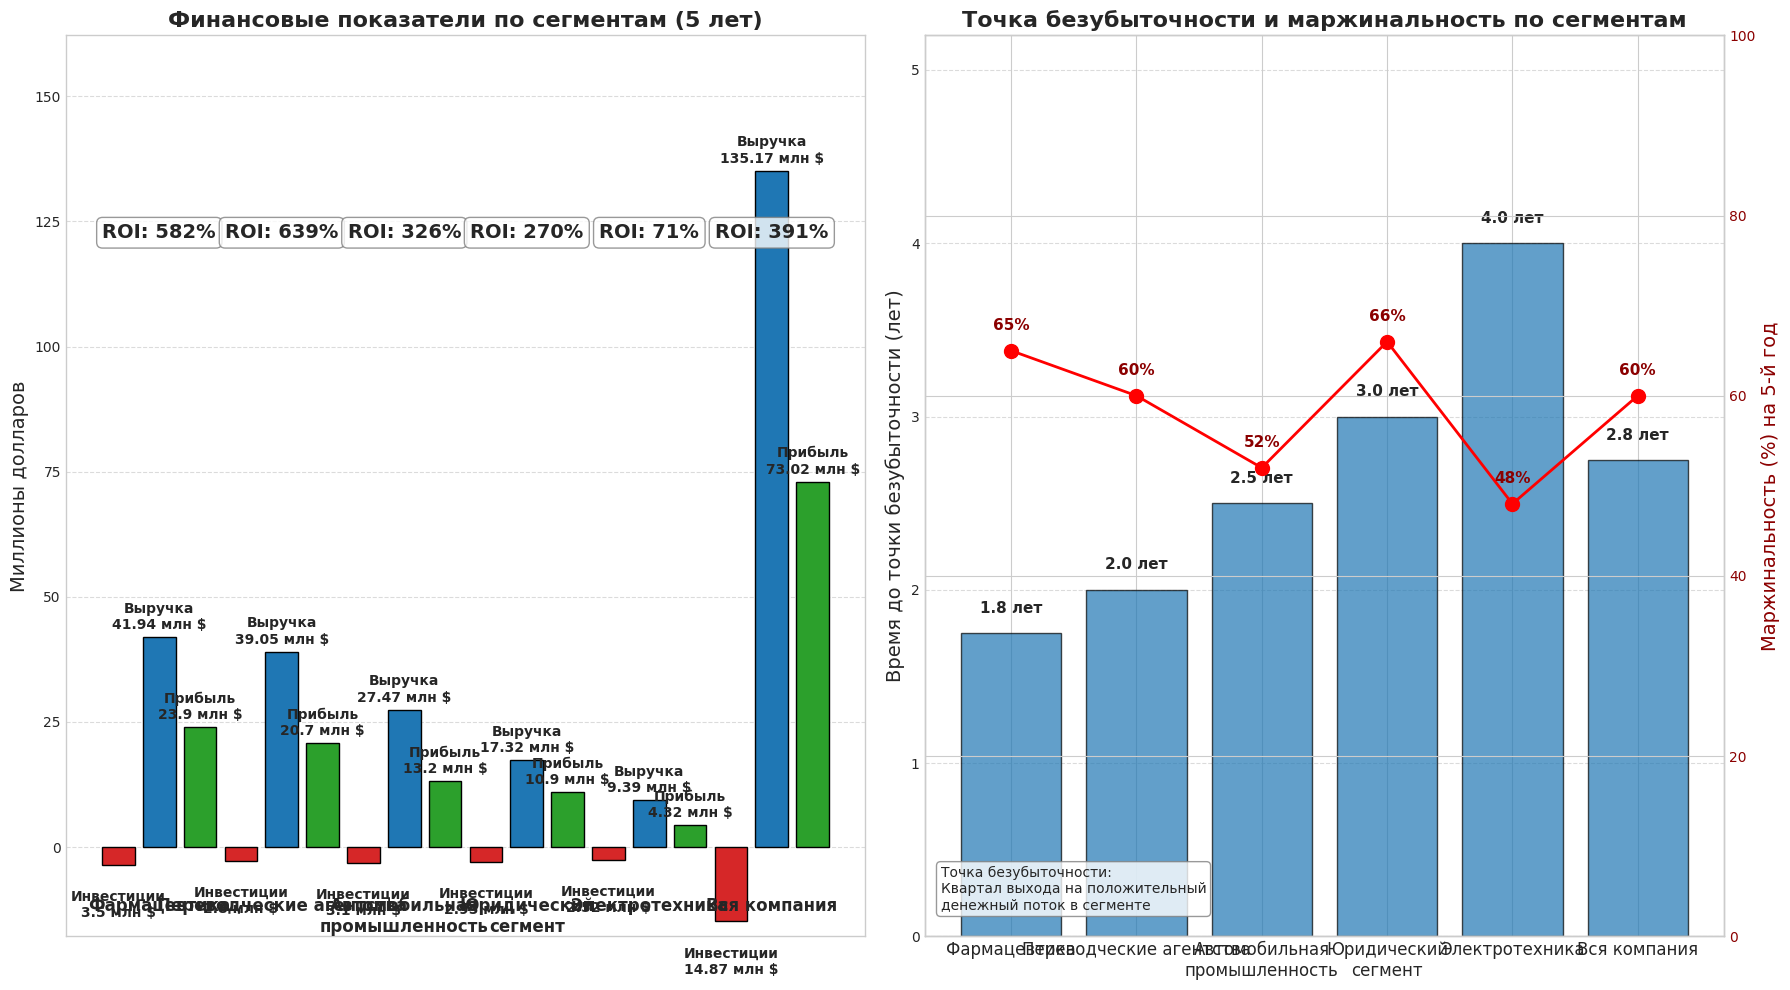

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['font.family'] = 'Arial'

# Данные для визуализации
segments = ['Фармацевтика', 'Переводческие агентства', 'Автомобильная\nпромышленность', 
            'Юридический\nсегмент', 'Электротехника', 'Вся компания']

# Инвестиции, выручка за 5 лет, валовая прибыль за 5 лет и ROI
investments = [3.5, 2.8, 3.1, 2.95, 2.52, 14.87]  # в млн $
revenue_5y = [41.94, 39.05, 27.47, 17.32, 9.39, 135.17]  # в млн $
gross_profit_5y = [23.9, 20.7, 13.2, 10.9, 4.32, 73.02]  # в млн $
roi_5y = [582, 639, 326, 270, 71, 391]  # в %

# Данные по годам выхода на точку безубыточности
breakeven_quarters = [7, 8, 10, 12, 16, 11]
breakeven_years = [q/4 for q in breakeven_quarters]

# Создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# 1. Водопадная диаграмма: инвестиции -> выручка -> валовая прибыль
def waterfall_chart(ax, segments, investments, revenue, profit):
    # Создаем данные для водопадной диаграммы
    x_pos = np.arange(len(segments))
    bar_heights = []
    bar_positions = []
    bar_colors = []
    bar_labels = []
    
    for i, segment in enumerate(segments):
        # Инвестиции (отрицательные)
        bar_heights.append(-investments[i])
        bar_positions.append(i*3)
        bar_colors.append('#d62728')  # красный
        bar_labels.append(f'Инвестиции\n{investments[i]} млн $')
        
        # Выручка (положительная)
        bar_heights.append(revenue[i])
        bar_positions.append(i*3 + 1)
        bar_colors.append('#1f77b4')  # синий
        bar_labels.append(f'Выручка\n{revenue[i]} млн $')
        
        # Валовая прибыль (положительная)
        bar_heights.append(profit[i])
        bar_positions.append(i*3 + 2)
        bar_colors.append('#2ca02c')  # зеленый
        bar_labels.append(f'Прибыль\n{profit[i]} млн $')
    
    # Создаем барплот
    bars = ax.bar(bar_positions, bar_heights, width=0.8, color=bar_colors, edgecolor='black', linewidth=1)
    
    # Добавляем подписи для каждого столбца
    for bar, label in zip(bars, bar_labels):
        height = bar.get_height()
        y_pos = height + 1 if height > 0 else height - 5
        ax.text(bar.get_x() + bar.get_width()/2, y_pos, 
                label, ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=10, weight='bold')
    
    # Добавляем названия сегментов под группами столбцов
    for i, segment in enumerate(segments):
        ax.text(i*3 + 1, -10, segment, ha='center', va='top', fontsize=12, weight='bold')
    
    # Настройка графика
    ax.set_title('Финансовые показатели по сегментам (5 лет)', fontsize=16, weight='bold')
    ax.set_ylabel('Миллионы долларов', fontsize=14)
    ax.set_xticks([])
    ax.set_ylim(min(bar_heights) * 1.2, max(bar_heights) * 1.2)
    ax.grid(True, linestyle='--', alpha=0.7, axis='y')
    
    # Добавляем ROI для каждого сегмента
    for i, segment in enumerate(segments):
        ax.annotate(
            f'ROI: {roi_5y[i]}%', 
            xy=(i*3 + 1, max(bar_heights) * 0.9),
            xytext=(0, 0), 
            textcoords='offset points',
            fontsize=14,
            weight='bold',
            ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="gray", alpha=0.8)
        )

# 2. Точка безубыточности и маржинальность по сегментам
def breakeven_margin_chart(ax, segments, breakeven_years, margin_data):
    x_pos = np.arange(len(segments))
    
    # Данные о маржинальности за 5 год
    margin_year5 = [65, 60, 52, 66, 48, 60]  # в %
    
    # Создаем бары для времени до точки безубыточности
    bars = ax.bar(x_pos, breakeven_years, color='#1f77b4', alpha=0.7, edgecolor='black', linewidth=1)
    
    # Добавляем подписи для каждого столбца
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{breakeven_years[i]:.1f} лет', ha='center', va='bottom', 
                fontsize=11, weight='bold')
    
    # Настройка основного графика
    ax.set_ylim(0, max(breakeven_years) * 1.3)
    ax.set_ylabel('Время до точки безубыточности (лет)', fontsize=14)
    ax.set_title('Точка безубыточности и маржинальность по сегментам', fontsize=16, weight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(segments, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7, axis='y')
    
    # Создаем второстепенную ось для маржинальности
    ax2 = ax.twinx()
    line = ax2.plot(x_pos, margin_year5, 'ro-', linewidth=2, markersize=10, label='Маржинальность (Год 5)')
    
    # Добавляем подписи для линии маржинальности
    for i, value in enumerate(margin_year5):
        ax2.text(i, value + 2, f'{value}%', ha='center', va='bottom', 
                 fontsize=11, weight='bold', color='darkred')
    
    ax2.set_ylabel('Маржинальность (%) на 5-й год', fontsize=14, color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')
    ax2.set_ylim(0, 100)
    
    # Добавляем аннотацию о том, что такое точка безубыточности
    ax.annotate(
        'Точка безубыточности:\nКвартал выхода на положительный\nденежный поток в сегменте',
        xy=(0.02, 0.03),
        xycoords='axes fraction',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="gray", alpha=0.8)
    )

# Вызываем функции для создания графиков
waterfall_chart(ax1, segments, investments, revenue_5y, gross_profit_5y)
breakeven_margin_chart(ax2, segments, breakeven_years, None)

plt.tight_layout()
plt.savefig('roi_by_segment.png', dpi=300, bbox_inches='tight')
plt.show()